# Introduction

This notebook creates figures to help visualize several of the points made by the other two python notebooks. I kept it separate because it uses the module `geopandas`. Thus, if you are unfamiliar with this module, you can work through the other two notebooks just fine. Enjoy!

In [1]:
# Import modules and create necessary directories
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
import os

required_directories = [
    "helper_functions",
    "raw_data",
    "raw_data/Crosswalk",
    "processed_data",
    "Images/Analytic/supplimentary"
]

for directory in required_directories:
    if not os.path.exists(directory):
        os.makedirs(directory)

In [2]:
statecodes= {
    "AL":"01",
    "AZ":"04",
    "AR":"05",
    "CA":"06",
    "CO":"08",
    "CT":"09",
    "DE":"10",
    "DC":"11",
    "FL":"12",
    "GA":"13",
    "ID":"16",
    "IL":"17",
    "IN":"18",
    "IA":"19",
    "KS":"20",
    "KY":"21",
    "LA":"22",
    "ME":"23",
    "MD":"24",
    "MA":"25",
    "MI":"26",
    "MN":"27",
    "MS":"28",
    "MO":"29",
    "MT":"30",
    "NE":"31",
    "NV":"32",
    "NH":"33",
    "NJ":"34",
    "NM":"35",
    "NY":"36",
    "NC":"37",
    "ND":"38",
    "OH":"39",
    "OK":"40",
    "OR":"41",
    "PA":"42",
    "RI":"44",
    "SC":"45",
    "SD":"46",
    "TN":"47",
    "TX":"48",
    "UT":"49",
    "VT":"50",
    "VA":"51",
    "WA":"53",
    "WV":"54",
    "WI":"55",
    "WY":"56",
}

In [3]:
tracts_geo = None
for state, ID in statecodes.items():
    if tracts_geo is None:
        tracts_geo = gpd.read_file(f"raw_data/Shapefiles/tracts/{state}/tl_2019_{ID}_tract.dbf")
    else:
        tracts_geo = pd.concat([tracts_geo, gpd.read_file(f"raw_data/Shapefiles/tracts/{state}/tl_2019_{ID}_tract.dbf")])
tracts_geo.reset_index(drop=True, inplace=True)
tracts_geo = tracts_geo[(tracts_geo['ALAND'] > 2*tracts_geo['AWATER'])]
tracts_geo

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,01,055,010700,01055010700,107,Census Tract 107,G5020,S,87404337,2927199,+34.0726595,-085.8991944,"POLYGON ((-85.98699 34.04413, -85.98606 34.045..."
1,01,055,001300,01055001300,13,Census Tract 13,G5020,S,5083957,836213,+34.0078782,-085.9865947,"POLYGON ((-86.00068 34.00537, -86.00023 34.006..."
2,01,055,000900,01055000900,9,Census Tract 9,G5020,S,11932347,740907,+34.0003469,-086.0427603,"POLYGON ((-86.07079 34.00011, -86.07076 34.000..."
3,01,055,001700,01055001700,17,Census Tract 17,G5020,S,9118882,0,+33.9825311,-085.9518384,"POLYGON ((-85.96885 33.98825, -85.96884 33.988..."
4,01,055,010501,01055010501,105.01,Census Tract 105.01,G5020,S,50209675,7198559,+33.8992688,-086.0295803,"POLYGON ((-86.07352 33.90549, -86.07337 33.906..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72533,56,033,000200,56033000200,2,Census Tract 2,G5020,S,3510226,0,+44.7895266,-106.9649830,"POLYGON ((-106.97995 44.78784, -106.97990 44.7..."
72534,56,031,959400,56031959400,9594,Census Tract 9594,G5020,S,3104783174,10390675,+41.9289629,-104.9795974,"POLYGON ((-105.28145 42.12274, -105.28144 42.1..."
72535,56,031,959100,56031959100,9591,Census Tract 9591,G5020,S,2286143459,65738338,+42.4007990,-104.9480644,"POLYGON ((-105.28651 42.60583, -105.28608 42.6..."
72536,56,021,000800,56021000800,8,Census Tract 8,G5020,S,1275870,0,+41.1492936,-104.7986792,"POLYGON ((-104.80930 41.14624, -104.80926 41.1..."


<AxesSubplot:>

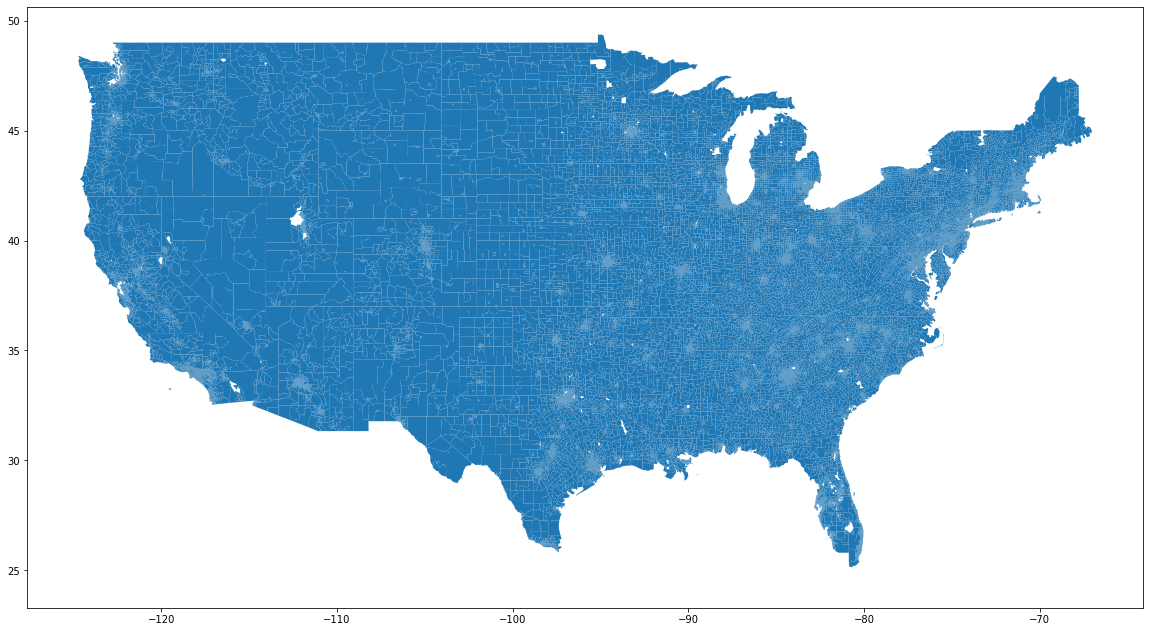

In [4]:
plt.rcParams['figure.figsize']=[20,30]
tracts_geo.plot()

In [5]:
%%bash
if [ ! -f "processed_data/fips_dist.csv" ]
then 
    g++ helper_functions/filter_fips_dist.cpp -o h\elper_functions/filter_fips_dist.out
    echo "compiled!"
    ./helper_functions/filter_fips_dist.out
else
    echo "File already exists. No need to run again."
fi

File already exists. No need to run again.


In [6]:
#Read in processed data
fips_dist = pd.read_csv("processed_data/fips_dist.csv", dtype={"tract1":"string", "tract2":"string"})
# fips_dist["tract1"]=fips_dist["tract1"].apply(lambda row: row.zfill(11))
# fips_dist["tract2"]=fips_dist["tract2"].apply(lambda row: row.zfill(11))
temp = set(fips_dist['tract2'].unique())
data = set([i[:2] for i in temp])
data

{'01',
 '04',
 '05',
 '06',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '53',
 '55'}

<AxesSubplot:>

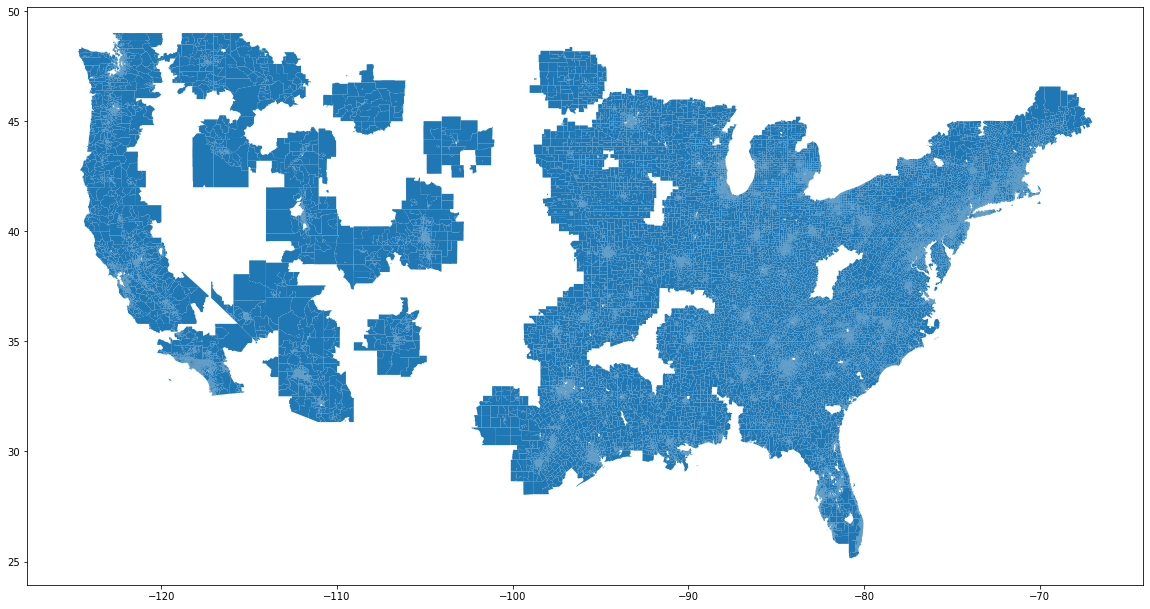

In [7]:
fips_dist = fips_dist.merge(tracts_geo, how='left', left_on='tract1', right_on='GEOID').reset_index(drop=True)
gpd.GeoDataFrame(fips_dist).plot()

In [8]:
#Import data and obtain census tract; export physician tracts
claims_data = pd.read_csv("processed_data/Physician_Data.csv", dtype={"Rndrng_NPI":"string", "Rndrng_Prvdr_Fips":"string"})
claims_data["Rndrng_Prvdr_Tract"] = claims_data["Rndrng_Prvdr_Fips"].apply(lambda val: str(val)[:11])
physician_tracts = set(claims_data["Rndrng_Prvdr_Tract"])
with open("processed_data/Phys_Tracts.txt", 'w') as out_file:
    out_file.write(','.join(list(physician_tracts)))
# claims_data['Lat'] = round(claims_data['Latitude'])
# claims_data['Long'] = round(claims_data['Longitude'])

claims_data

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Latitude,Longitude,Rndrng_Prvdr_Fips,Lat,Long,Rndrng_Prvdr_Tract
0,1194746966,Politz,Douglas,E,M.D.,M,I,2400 Cypress Glen Dr.,NaN,Wesley Chapel,...,1.00,1.00,1.00,1.00,28.191521,-82.372900,121010321061,28.0,-82.5,12101032106
1,1033166277,Mitchell,Jamie,C,M.D.,M,I,2400 Cypress Glen Dr,NaN,Wesley Chapel,...,1.00,1.00,1.00,1.00,28.191521,-82.372900,121010321061,28.0,-82.5,12101032106
2,1134369002,Parrack,Kevin,M,MD,M,I,2400 Cypress Glen Dr,NaN,Wesley Chapel,...,1.00,1.00,1.00,1.00,28.191521,-82.372900,121010321061,28.0,-82.5,12101032106
3,1255640124,Boone,Deva,NaN,MD,F,I,2400 Cypress Glen Dr,NaN,Wesley Chapel,...,1.00,1.00,1.00,1.00,28.191521,-82.372900,121010321061,28.0,-82.5,12101032106
4,1285711275,Ruan,Daniel,T,M.D.,M,I,2400 Cypress Glen Dr,NaN,Wesley Chapel,...,1.00,1.00,1.00,1.00,28.191521,-82.372900,121010321061,28.0,-82.5,12101032106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,1982851176,Albert,Scott,P,MD,M,I,750 E Adams St,Dept Of Surgery,Syracuse,...,1821.00,939.91,751.69,787.46,43.042514,-76.141056,360670043011,43.0,-76.0,36067004301
441,1477782100,Dhir,Mashaal,NaN,MBBS,M,I,750 E Adams St,NaN,Syracuse,...,2433.45,939.91,751.69,787.46,43.042514,-76.141056,360670043011,43.0,-76.0,36067004301
442,1609096775,Dickson,Paxton,V,M.D.,M,I,7945 Wolf River Blvd,Suite 289,Germantown,...,2680.00,867.18,692.09,751.67,35.110956,-89.798631,471570213511,35.0,-90.0,47157021351
443,1710112214,Wachtel,Heather,NaN,MD,F,I,3400 Spruce St,NaN,Philadelphia,...,6994.00,1002.84,799.01,787.46,39.950014,-75.194092,421010369013,40.0,-75.0,42101036901


In [9]:
phys_locations = pd.DataFrame(claims_data.groupby(['Lat', 'Long']).agg({'Rndrng_NPI':'count', 'Tot_PTX':'sum'}))
phys_locations= phys_locations.reset_index()
phys_locations.rename(columns={"Rndrng_NPI":"Phys_Count"}, inplace=True)
phys_locations

,Lat,Long,Phys_Count,Tot_PTX
0,25.5,-80.5,2,37
1,26.0,-81.5,1,12
2,26.0,-80.5,1,12
3,26.0,-80.0,2,50
4,26.5,-98.0,1,11
...,...,...,...,...
192,47.5,-122.5,4,143
193,47.5,-120.5,1,12
194,47.5,-117.5,1,25
195,47.5,-117.0,2,27


In [10]:
# claims_data[claims_data['Rndrng_Prvdr_State_Abrvtn'] == 'CA']
claims_data[claims_data['Rndrng_Prvdr_City'].isin(['Los Angeles', 'San Diego'])]

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt,Latitude,Longitude,Rndrng_Prvdr_Fips,Lat,Long,Rndrng_Prvdr_Tract
12,1033132865,Yeh,Michael,W,MD,M,I,100 Ucla Medical Plz Ste 310,NaN,Los Angeles,...,6384.03,929.85,734.74,693.90,34.065729,-118.434999,060372652011,34.0,-118.5,06037265201
36,1659566875,Livhits,Masha,J,M.D.,F,I,100 Ucla Medical Plz Ste 310,NaN,Los Angeles,...,6516.11,1040.40,830.12,788.61,34.065729,-118.434999,060372652011,34.0,-118.5,06037265201
58,1831349935,Harari,Avital,NaN,M.D.,F,I,100 Ucla Medical Plz Ste 310,NaN,Los Angeles,...,7466.18,904.68,719.31,638.58,34.065729,-118.434999,060372652011,34.0,-118.5,06037265201
88,1386983286,Rochefort,Holly,NaN,MD,F,I,1200 N State St,NaN,Los Angeles,...,1076.13,371.88,293.93,299.94,34.060400,-118.208810,060372033001,34.0,-118.0,06037203300
114,1033177803,Bouvet,Michael,NaN,M.D.,M,I,200 W Arbor Dr,Ucsd Medical Center,San Diego,...,2935.00,1003.30,802.25,787.46,32.754875,-117.166526,060730004002,33.0,-117.0,06073000400
356,1386829604,Ho,Allen,S,M.D.,M,I,8631 W 3rd St,Suite 640e,Los Angeles,...,3146.77,1006.44,804.04,757.17,34.073730,-118.380360,060372149021,34.0,-118.5,06037214902
363,1598779605,Cohen,Jason,S,M.D.,M,I,8700 Beverly Blvd,Cs-Occ,Los Angeles,...,46600.00,964.08,761.67,757.17,34.076545,-118.380005,060377004004,34.0,-118.5,06037700400
426,1033193669,Brumund,Kevin,T,MD,M,I,200 W Arbor Dr Dept 8895,NaN,San Diego,...,4326.00,989.73,788.68,787.46,32.754875,-117.166526,060730004002,33.0,-117.0,06073000400


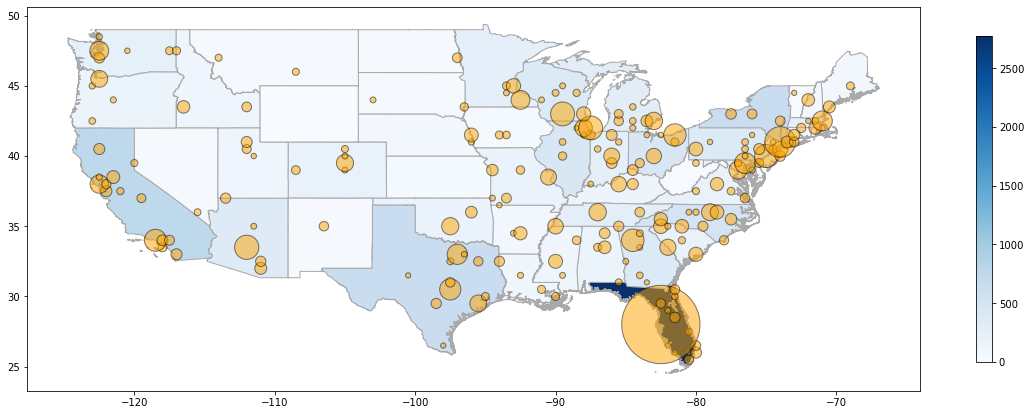

In [11]:
state_data = gpd.read_file("raw_data/Shapefiles/vt021tk4894.shp")
state_data = state_data.merge(claims_data[['Tot_PTX','Rndrng_Prvdr_State_Abrvtn']], how='left',left_on='stpostal', right_on='Rndrng_Prvdr_State_Abrvtn')
state_data = gpd.GeoDataFrame(state_data.groupby('stpostal').agg({'Tot_PTX':'sum', 'geometry':'first', 'stfips':'first'}))

state_data['stfips'] = state_data['stfips'].astype(int)
state_data = state_data[state_data['stfips'] <=56]
state_data = state_data[~state_data['stfips'].isin([2,15])]
state_data 

state_data.plot(column='Tot_PTX', cmap='Blues', edgecolor='darkgrey', legend=True, legend_kwds={'shrink':0.2})
plt.scatter(phys_locations['Long'], phys_locations['Lat'], s=phys_locations['Tot_PTX']**1/2*5, color='Orange', edgecolor='black', alpha=0.5)
# for _, row in phys_locations.iterrows():
#     plt.text(row['Long']-.3, row['Lat']-.7, str(int(row['Tot_PTX'])), fontsize=10)

plt.show()

In [12]:
claims_dist = fips_dist.merge(claims_data.drop_duplicates(subset=['Lat', 'Long']), how='left', left_on='tract2', right_on='Rndrng_Prvdr_Tract')
cols_to_keep=set(['tract1', 'mi_to_tract','tract2', 'Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name'])
claims_dist = claims_dist[list(cols_to_keep)]
claims_dist

,Rndrng_Prvdr_Last_Org_Name,Rndrng_NPI,tract2,tract1,mi_to_tract
0,NaN,<NA>,01073004701,01001020100,73.196
1,NaN,<NA>,01073004701,01001020200,73.533
2,NaN,<NA>,01073004701,01001020300,73.834
3,NaN,<NA>,01073004701,01001020400,74.257
4,NaN,<NA>,01073004701,01001020500,75.425
...,...,...,...,...,...
67782,NaN,<NA>,49035101700,56041975200,88.400
67783,NaN,<NA>,49035101700,56041975300,65.913
67784,NaN,<NA>,49035101700,56041975400,60.463
67785,Statz,1174550628,46103010905,56045951100,68.519


In [13]:
claims_geo = claims_dist.merge(tracts_geo, how='left', left_on='tract1', right_on='GEOID')
cols_to_keep.add('geometry')
claims_geo = claims_geo[list(cols_to_keep)]


claims_geo

,geometry,Rndrng_Prvdr_Last_Org_Name,Rndrng_NPI,tract2,tract1,mi_to_tract
0,"POLYGON ((-86.51038 32.47225, -86.51031 32.472...",NaN,<NA>,01073004701,01001020100,73.196
1,"POLYGON ((-86.48127 32.47744, -86.48126 32.477...",NaN,<NA>,01073004701,01001020200,73.533
2,"POLYGON ((-86.47087 32.47573, -86.47084 32.475...",NaN,<NA>,01073004701,01001020300,73.834
3,"POLYGON ((-86.45394 32.49318, -86.45372 32.493...",NaN,<NA>,01073004701,01001020400,74.257
4,"POLYGON ((-86.43842 32.44973, -86.43838 32.449...",NaN,<NA>,01073004701,01001020500,75.425
...,...,...,...,...,...,...
67782,"POLYGON ((-110.74301 41.28913, -110.74301 41.2...",NaN,<NA>,49035101700,56041975200,88.400
67783,"POLYGON ((-111.04682 41.15602, -111.04682 41.1...",NaN,<NA>,49035101700,56041975300,65.913
67784,"POLYGON ((-111.04679 41.24816, -111.04678 41.2...",NaN,<NA>,49035101700,56041975400,60.463
67785,"POLYGON ((-105.08177 43.59211, -105.08175 43.5...",Statz,1174550628,46103010905,56045951100,68.519


In [14]:
state_data = gpd.read_file("raw_data/Shapefiles/vt021tk4894.shp")
state_data = state_data.merge(claims_data[['Tot_PTX','Rndrng_Prvdr_State_Abrvtn']], how='left',left_on='stpostal', right_on='Rndrng_Prvdr_State_Abrvtn')
state_data = gpd.GeoDataFrame(state_data.groupby('stpostal').agg({'Tot_PTX':'sum', 'geometry':'first', 'stfips':'first'}))
state_data['stfips'] = state_data['stfips'].astype(int)
state_data = state_data[state_data['stfips'] <=56]
state_data = state_data[~state_data['stfips'].isin([2,15])]
state_data 

,Tot_PTX,geometry,stfips
stpostal,,,
AL,157.0,"MULTIPOLYGON (((-88.05337 30.19537, -88.05418 ...",1
AR,96.0,"POLYGON ((-89.73310 36.00061, -89.73305 36.000...",5
AZ,350.0,"POLYGON ((-109.04523 36.99909, -109.04523 36.9...",4
CA,766.0,"MULTIPOLYGON (((-117.12486 32.55696, -117.1231...",6
CO,196.0,"POLYGON ((-104.05326 41.00141, -104.05154 41.0...",8
CT,75.0,"MULTIPOLYGON (((-73.62247 40.98430, -73.62167 ...",9
DC,65.0,"MULTIPOLYGON (((-77.02434 38.80312, -77.02546 ...",11
DE,33.0,"MULTIPOLYGON (((-75.07991 38.45585, -75.07991 ...",10
FL,2778.0,"MULTIPOLYGON (((-81.96339 24.52110, -81.96375 ...",12


/home/sdsquires/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:2334: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4269

  return geopandas.overlay(
/home/sdsquires/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:2334: UserWarning: `keep_geom_type=True` in overlay resulted in 12537 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


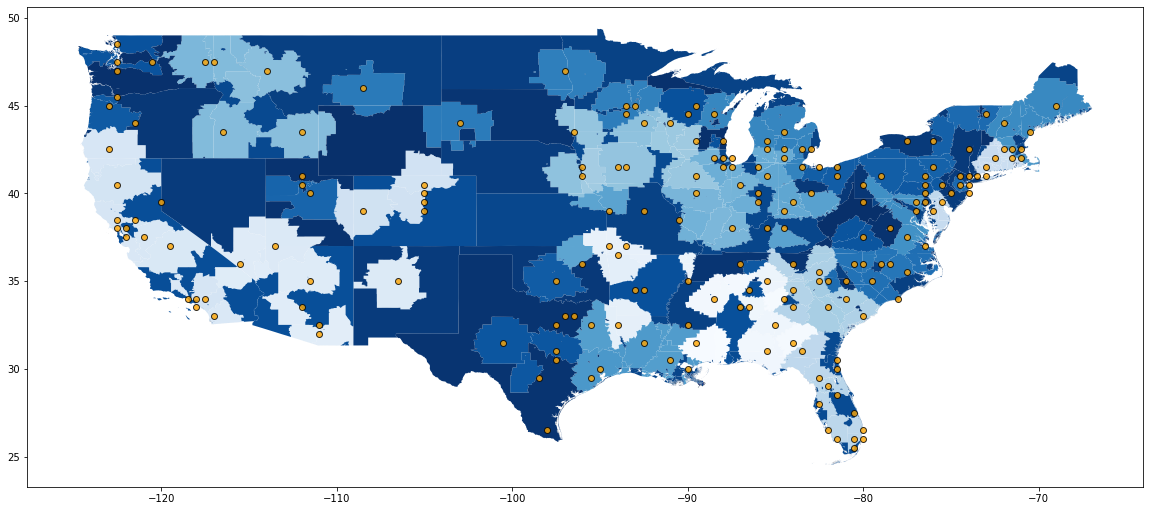

In [19]:
combined_tract_data = gpd.GeoDataFrame(claims_geo).dissolve(by='Rndrng_NPI')

state_data.overlay(combined_tract_data, how='identity').plot(cmap='Blues')
plt.scatter(phys_locations['Long'], phys_locations['Lat'],  color='Orange', edgecolor='black', alpha=0.8)
plt.show()

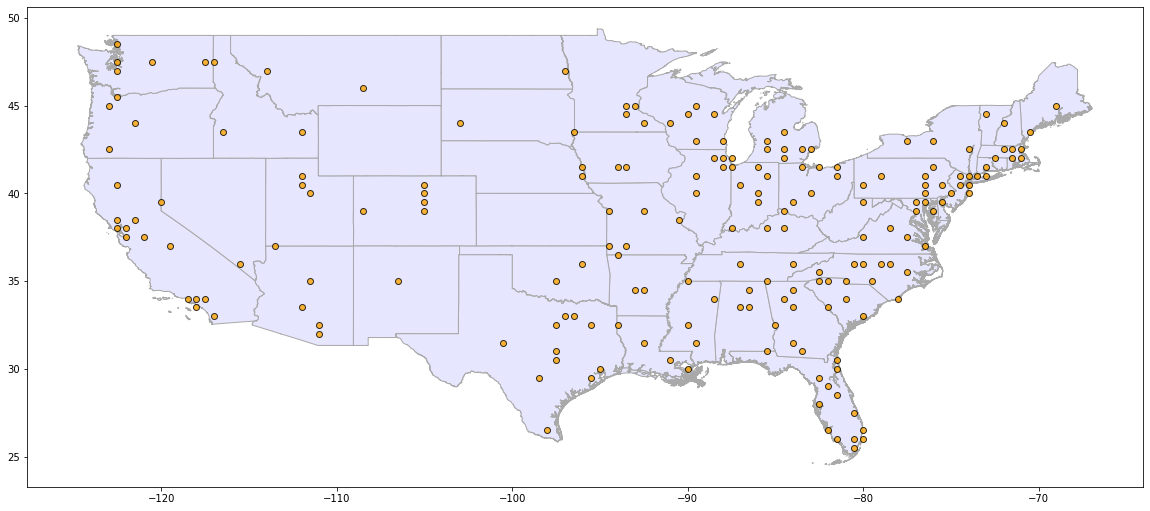

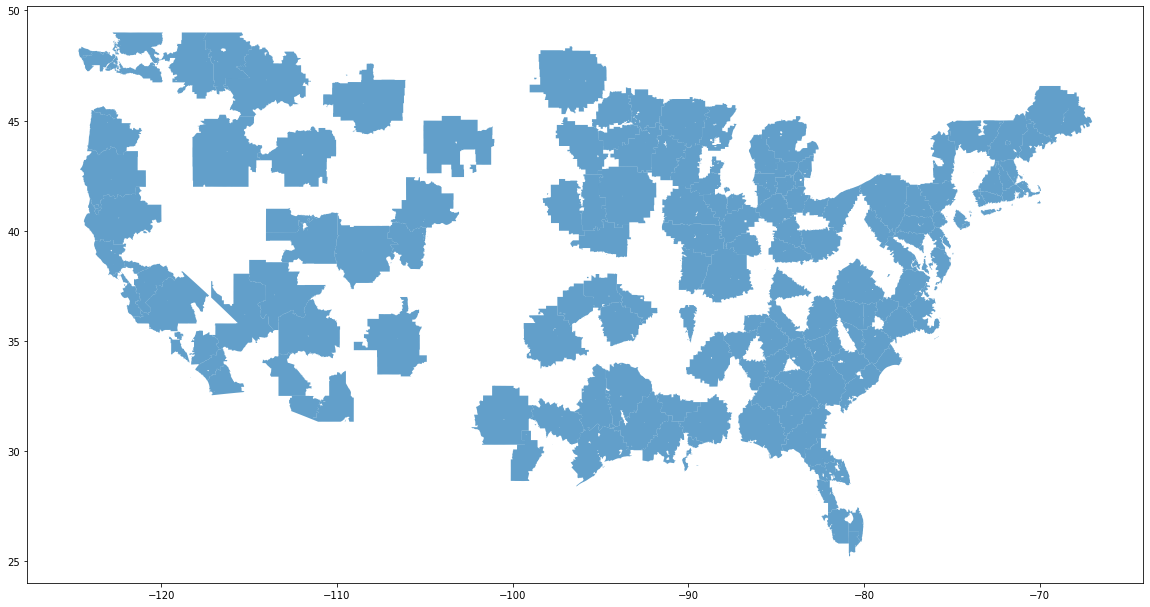

In [20]:
state_data.plot(edgecolor='darkgrey', color=(.9,.9,1))
plt.scatter(phys_locations['Long'], phys_locations['Lat'],  color='Orange', edgecolor='black', alpha=0.8)
# for _, row in phys_locations.iterrows():
#     plt.text(row['Long']-.3, row['Lat']-.7, str(int(row['Tot_PTX'])), fontsize=10)


combined_tract_data.plot(alpha=0.7)

plt.show()

<AxesSubplot:>

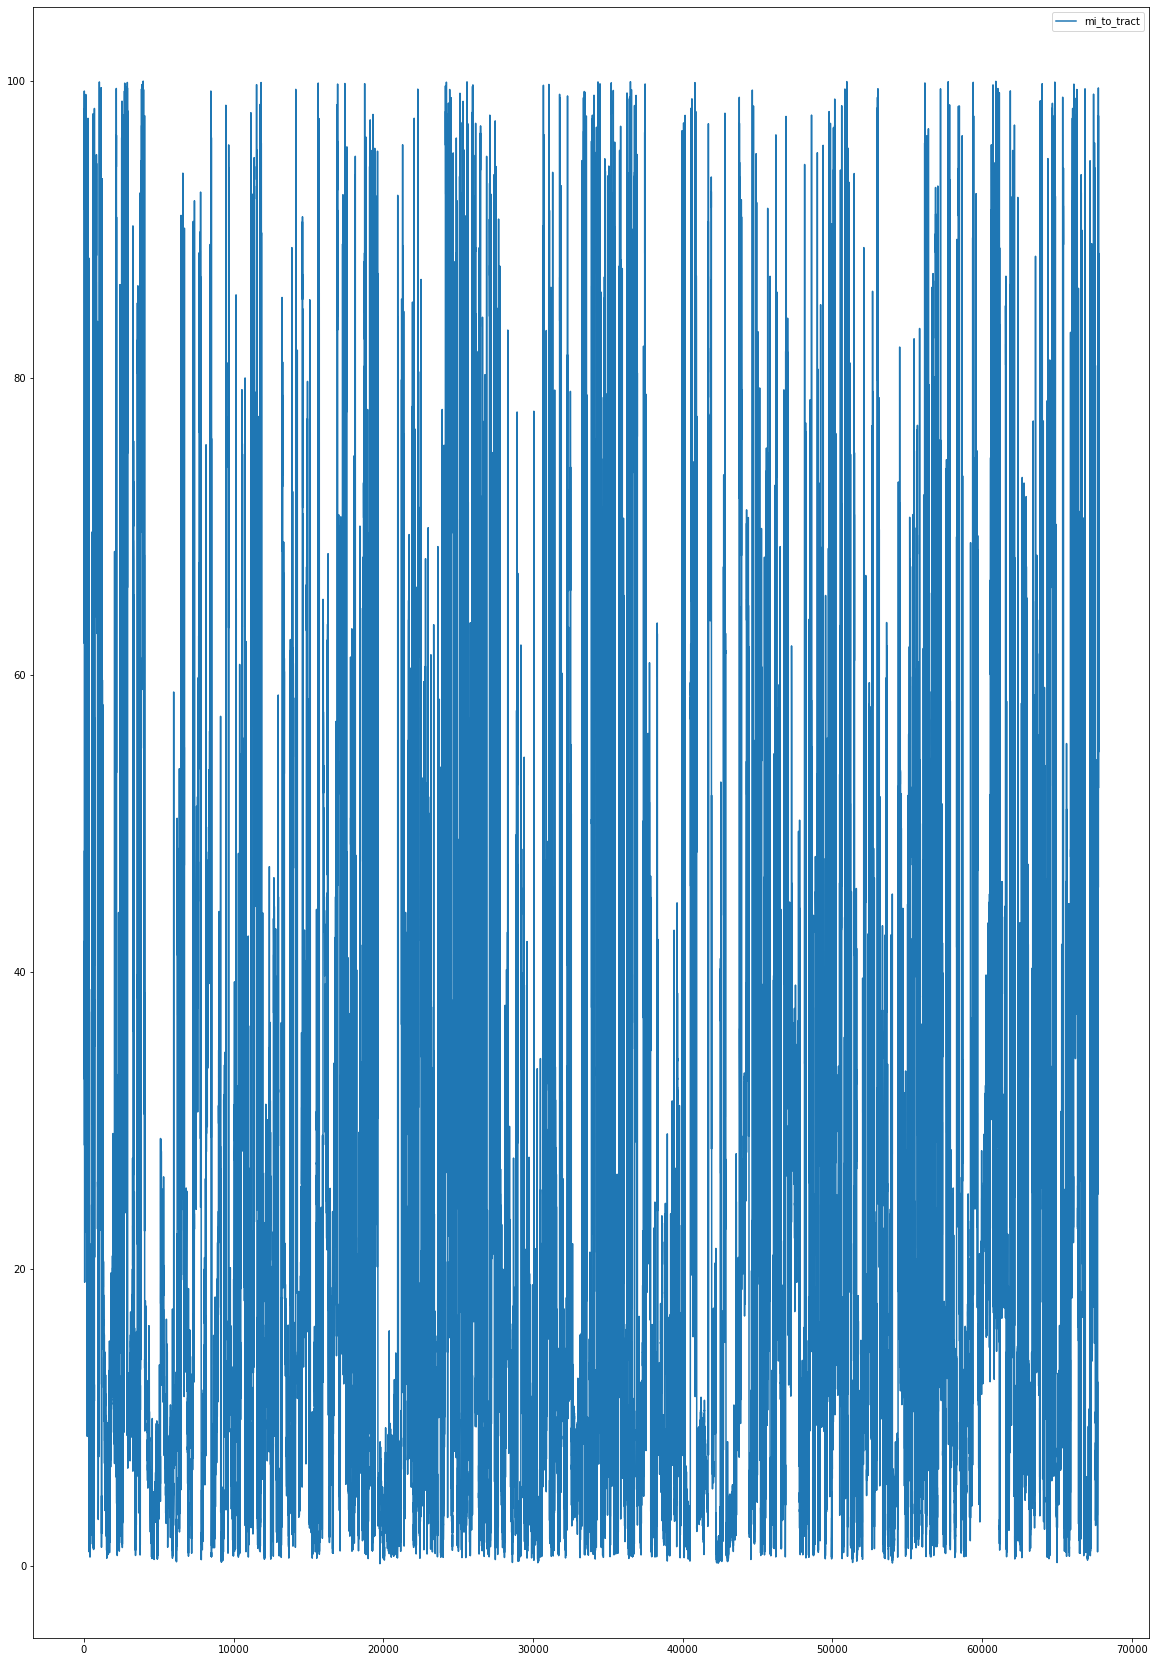

In [17]:
claims_geo.plot()

In [18]:
polygons = [poly1, poly2]
boundary = gpd.GeoSeries(cascaded_union(polygons))
boundary.plot(color = 'red')
plt.show()

NameError: name 'poly1' is not defined

In [ ]:
claims_data.columns